In [1]:
import pandas as pd
import numpy as np

import sklearn as sk
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.ensemble
import sklearn.neighbors
import sklearn.metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# lê o dataset e confere o conteúdo
data = pd.read_csv("../data/plantao1_aula8.data", header=None, sep=' ')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# checa por nans e duplicados
print(f"Número de duplicados: {data.duplicated().sum()}")
print(f"Número de nans: {data.isnull().sum()}")

Número de duplicados: 0
Número de nans: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [5]:
# checa desbalanecamento
data[20].value_counts()

1    700
2    300
Name: 20, dtype: int64

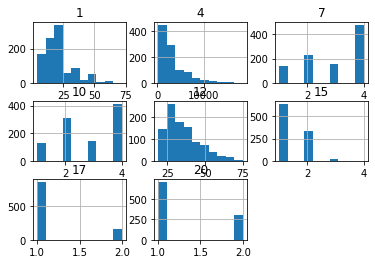

In [41]:
# análise dos atributos
histograms = data.hist() # vai automaticamente plotar só atributos numéricos

In [45]:
# exploração dos atributos que não parecem normais
print(data[7].value_counts())
print(data[10].value_counts())
print(data[15].value_counts())
print(data[17].value_counts())

4    476
2    231
3    157
1    136
Name: 7, dtype: int64
4    413
2    308
3    149
1    130
Name: 10, dtype: int64
1    633
2    333
3     28
4      6
Name: 15, dtype: int64
1    845
2    155
Name: 17, dtype: int64


In [51]:
# vamos transformar essas colunas e as outras colunas categóricas
data.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
dtype: object

In [56]:
cat_columns = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19, 7, 10, 15, 17]
data_no_cat = pd.get_dummies(data, columns=cat_columns)
data_no_cat.head()

,1,4,12,20,0_A11,0_A12,0_A13,0_A14,2_A30,2_A31,...,10_1,10_2,10_3,10_4,15_1,15_2,15_3,15_4,17_1,17_2
0,6,1169,67,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,48,5951,22,2,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,12,2096,49,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,42,7882,45,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,24,4870,53,2,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [109]:
# as colunas restantes, vamos escalar usando normalização, 
# mas antes precisamos quebrar entre teste e treino

# separa target dos atributos
X, Y = data_no_cat.drop(20, axis=1).values.astype(np.float32), data_no_cat[20].values.astype(np.float32)
print(X[0])
print(Y[:5])
# sk.model_selection.train_test_split()

[6.000e+00 1.169e+03 6.700e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00]
[1. 2. 1. 1. 2.]


In [110]:
# transforma o target em rótulo binário
Y = Y - 1
Y[:5]

array([0., 1., 0., 0., 1.], dtype=float32)

In [111]:
# separa treino e teste
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(
    X, Y, test_size=0.1, train_size=0.9, stratify=Y)

In [112]:
# e agora podemos fazer a normalização nas colunas numéricas
# cuidado com o tipo, normalização precisa de floats
scaler = sk.preprocessing.StandardScaler()
scaler.fit(x_train[:, :3])
x_train[:, :3] = scaler.transform(x_train[:, :3])
x_test[:, :3] = scaler.transform(x_test[:, :3])
print(x_train[0])

[-1.1650075  -0.23522966 -0.04880411  0.          1.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          0.          1.          1.          0.          0.
  0.          0.          0.          1.          0.          1.
  0.          0.          0.          1.          0.          1.
  0.          1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          1.          0.        ]


In [114]:
# agora escolhemos um modelo
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=3)

# e fazemos uma validação cruzada
kfold = sk.model_selection.StratifiedKFold(n_splits=5)
sk.model_selection.cross_val_score(estimator=clf, X=x_train, y=y_train, cv=kfold)

array([0.72222222, 0.73333333, 0.67777778, 0.67777778, 0.71111111])

In [116]:
# avaliamos outros parâmetros/algoritmos
for k in [3, 5, 7, 10]:
    clf = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
    kfold = sk.model_selection.StratifiedKFold(n_splits=5)
    cross_val = sk.model_selection.cross_val_score(estimator=clf, X=x_train, y=y_train, cv=kfold)
    print(f"{k} vizinhos: {cross_val.mean()}")

3 vizinhos: 0.7044444444444444
5 vizinhos: 0.7266666666666668
7 vizinhos: 0.7366666666666667
10 vizinhos: 0.7344444444444445
